# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

#from sklearn.datasets import make_blobs, make_moons
#from sklearn.cluster import DBSCAN
#from sklearn.metrics import silhouette_score

# Cargar datos

* Creo path (recordar montaar el drive)

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Platzi_ML/04_Clustering/05_Proyecto/data.csv"

* Cargo data

In [3]:
df_country = pd.read_csv(path)

* Verifiquemos que se cargo bien

In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Limpieza/Preprocesado de la data

## Manejo de nulos

* Validemos nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Manejo de duplicados

* Validemos duplicados

In [6]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Detección de outliers (análisis de la distribución)

* Vamos a sacar columnas de tipo objeto

In [7]:
int_cols = df_country.select_dtypes(exclude= 'object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

* Iteremos sobre columnas numéricas para sacr su box plot

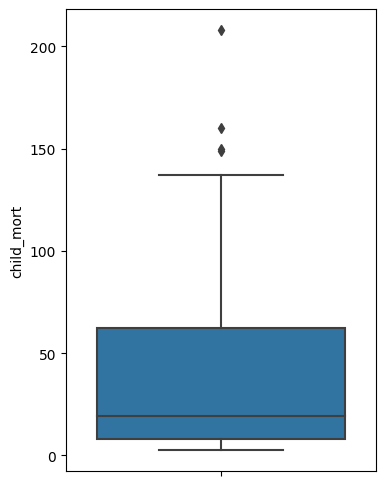

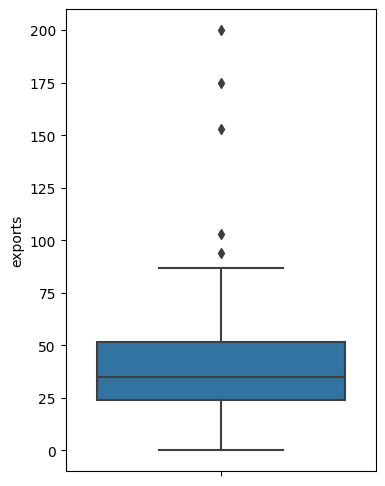

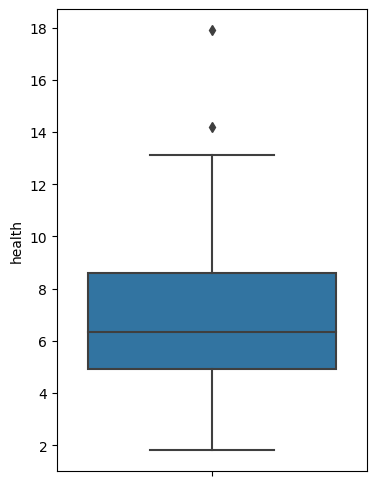

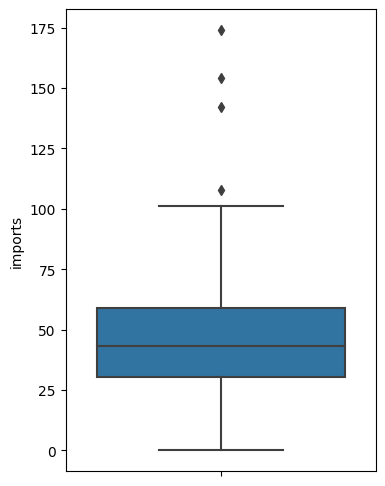

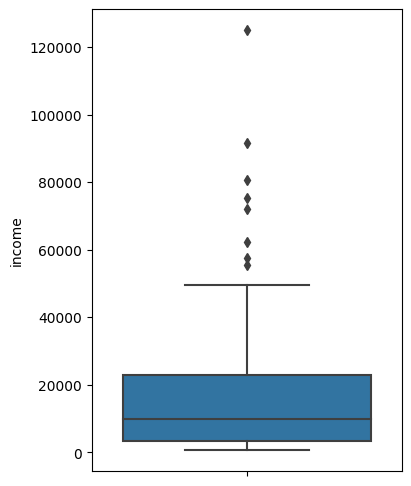

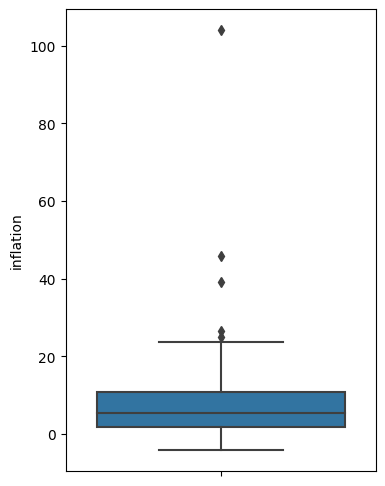

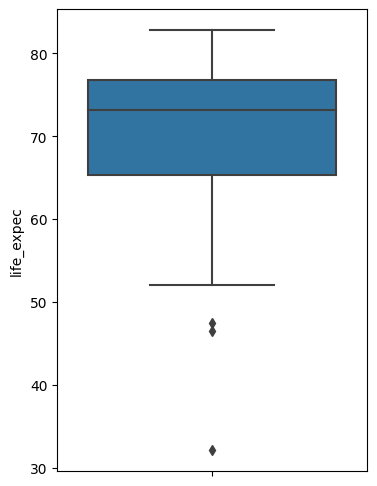

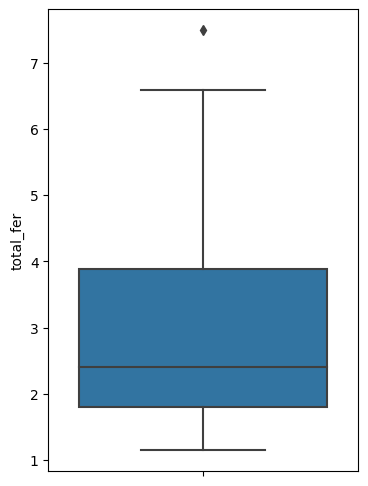

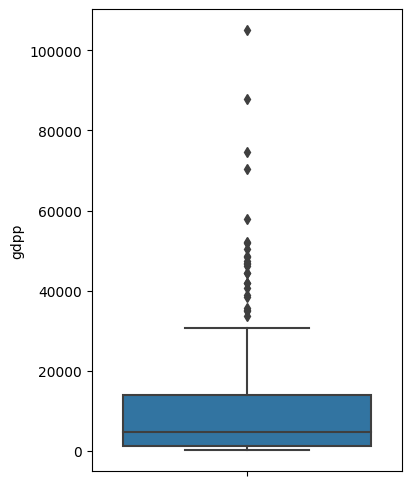

In [8]:
for _ in int_cols:
  plt.figure(figsize=(4,6))
  sns.boxplot(data=df_country, y = _)
  plt.show()
  # vemos que son pocos los outliers, pero no los eliminemos. 
  # Solo la inflación hay un outlier muy grande, pero hace parte de la economía del pais,
  # hace parte de kla economía del país, no valdría eliminarlo

* Heatmap de correlación de outliers

<ipython-input-9-597c6bf8f58b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_country.corr(), annot = True, cmap='coolwarm')


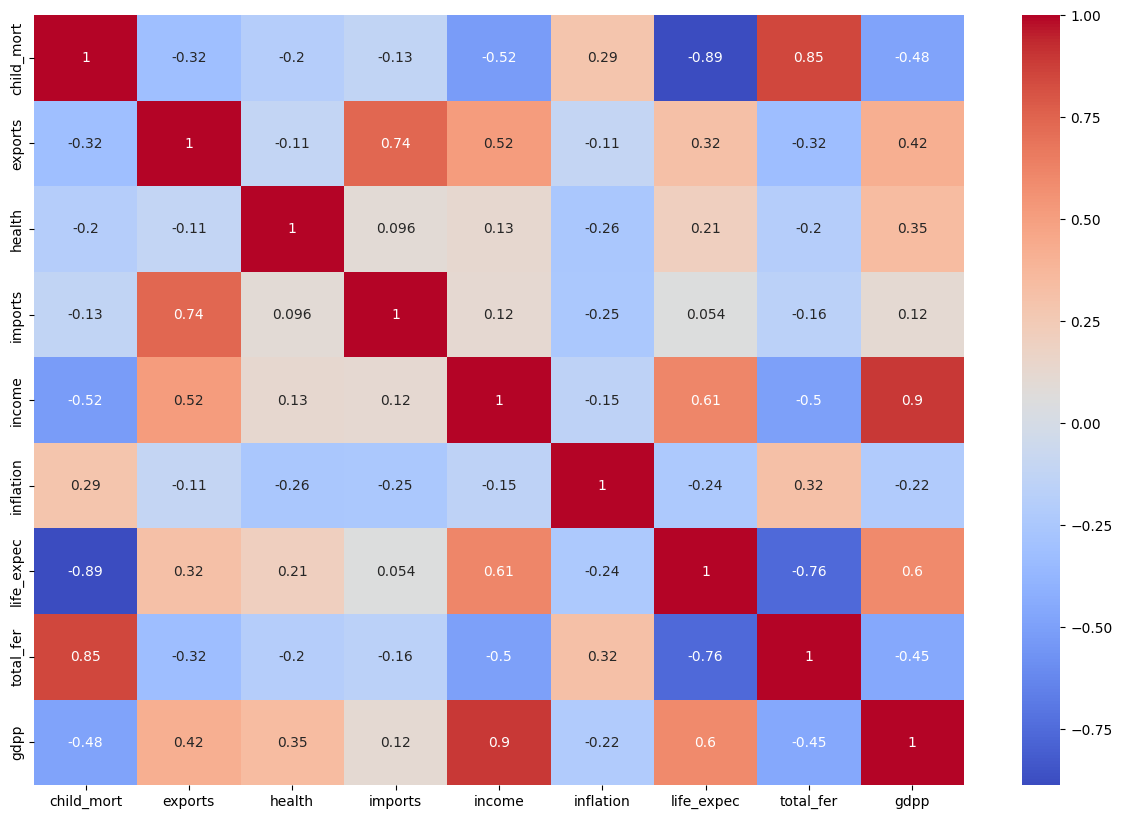

In [9]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df_country.corr(), annot = True, cmap='coolwarm')
plt.show()

#income y gdpp (producto per capita), muy correlacionados.
#expectativa de vida y total fer, tambien muy correlacionadas
#mortalidad infantil y totalfer.

#de momento no eliminaremos ninguna

* Escalado de datos

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#escalar y quito nombres de paises, pues sobran
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [11]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country', axis=1).columns)
df_country_scaled.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


## PCA (Reducción de dimensionalidad)

## Aplicación

* Imports

In [12]:
from sklearn.decomposition import PCA

* Instancio pca

In [13]:
pca = PCA()

* Aplico PCA

In [14]:
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

* Evaluemos ratio de varianza

In [15]:
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

* Grafiquemos la suma acumulado

Text(0, 0.5, '% Variance')

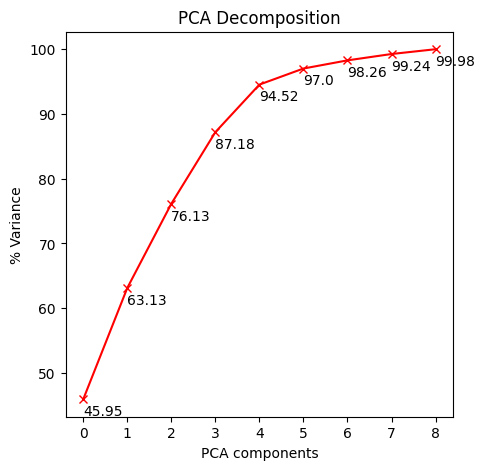

In [16]:
# obtengamos la varianza acumulada, con vuatro decimales, y en %
accum_var = np.cumsum(np.round(var, decimals=4)*100)

#sino pordia hcr un simple plt.plot(accum_var)
components = list(range(0,9))
plt.figure(figsize=(5,5))
for s,d in zip(components,accum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,accum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

* Selecciónde número de Features

In [17]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis =1, inplace = True)
pca_data_standard.head(2)

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059


# ENTRENAMIENTO PROYECTO

## Imports

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN #entrenar
from sklearn.metrics import silhouette_score # medir
from scipy.cluster.hierarchy import dendrogram, linkage #dendrograma

## K-MEANS (sobre DS con y sin PCA)

### Con PCA

* No sabemos k, lo desconocemos, vamos a iterar sobre multiples k's

In [19]:
Sum_of_squared_distance = [] #para grfica codo
silhouette_scores = [] #para grafica indices de silueta
K = range(2,15)

for _ in K:
  km = KMeans(n_clusters= _) #creamos modelo
  y = km.fit_predict(pca_data_standard) #predecimos
  Sum_of_squared_distance.append(km.inertia_) #suma de distancais para grafica de codo
  silhouette_scores.append(silhouette_score(pca_data_standard, y)) #s_core de pca vs y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

* Grafiquemos los resultados para el codo

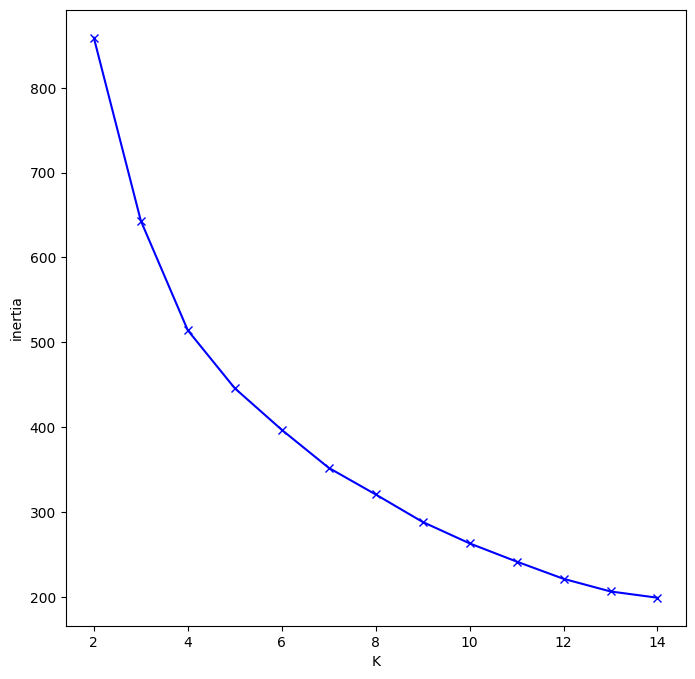

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distance, 'bx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

#codo se ve como entre 4-5

* Grafiquemos los resultados para silueta

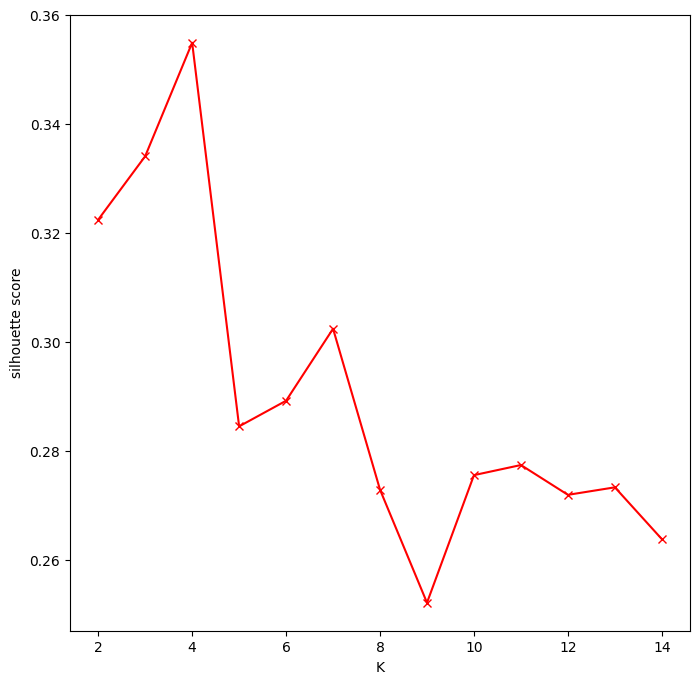

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

#se ve que se maximiza en 4

* Entrenamos con 4 clusters

In [22]:
km = KMeans(n_clusters= 4) #creamos modelo
y = km.fit_predict(pca_data_standard) #predecimos

print(silhouette_score(pca_data_standard, y)) #pca vs y

#meto resultado en df
df_country['k_means_pca'] = y

0.35491314499063326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Sin PCA

In [23]:
Sum_of_squared_distance = [] #para grfica codo
silhouette_scores = [] #para grafica indices de silueta
K = range(2,15)

for _ in K:
  km = KMeans(n_clusters= _) #creamos modelo
  y = km.fit_predict(df_country_scaled) #predecimos
  Sum_of_squared_distance.append(km.inertia_) #suma de distancais para grafica de codo
  silhouette_scores.append(silhouette_score(df_country_scaled, y)) #s_core de pca vs y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

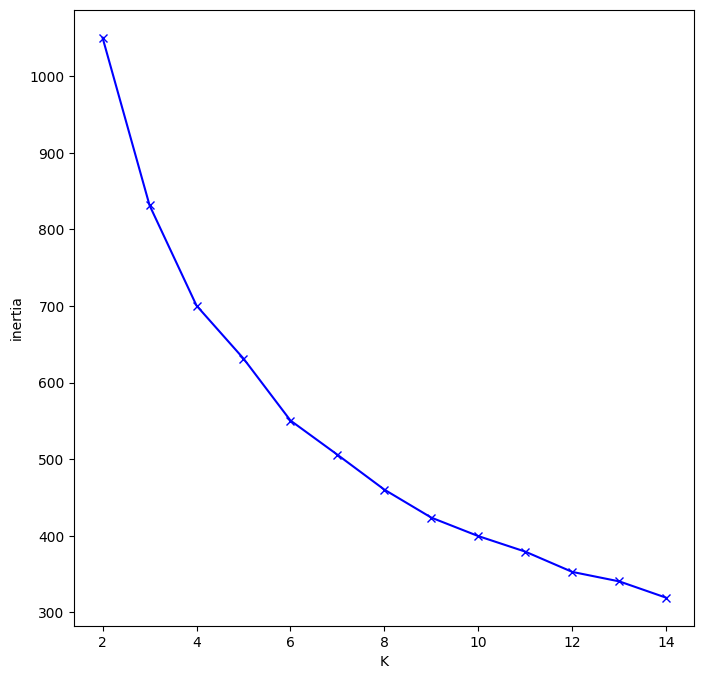

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distance, 'bx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

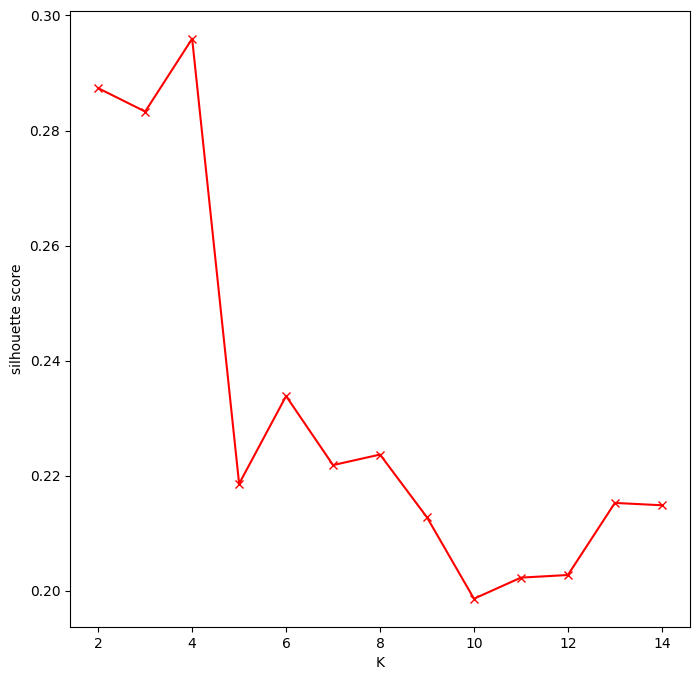

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-') #kvs datos para el codo
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

#aqui tambien con 4

In [26]:
km = KMeans(n_clusters= 4) #creamos modelo
y = km.fit_predict(df_country_scaled) #predecimos

print(silhouette_score(df_country_scaled, y)) #pca vs y

#meto resultado en df 
df_country['k_means'] = y

#preores resultados, vemos que reduccion de dim, si funciona

0.29595170577528157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical Clustering

### Con PCA

* Ejecutemos dendograma

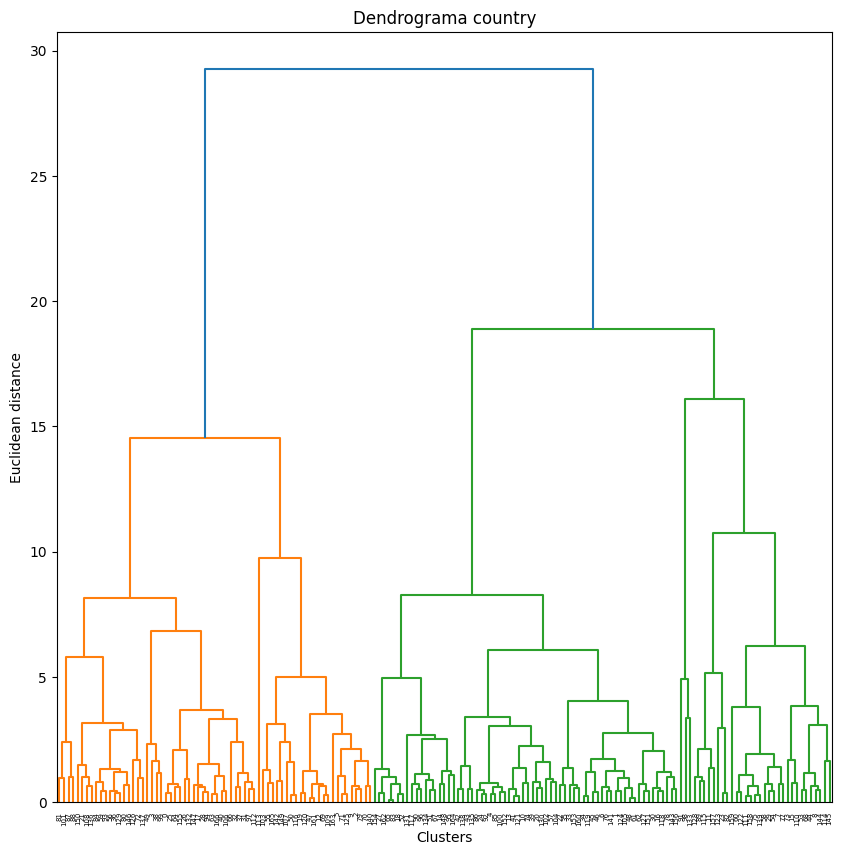

In [27]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method = 'ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.title('Dendrograma country')
plt.show()

# sen 2 clusters muy separados (paises que les va bien y mal, y también con 3 hay buena separacion)

* Vamos a hacer clustering con 2 y 3, para probar

In [28]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta
df_country['hc_pca'] = y_hc

0.3070110704080526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

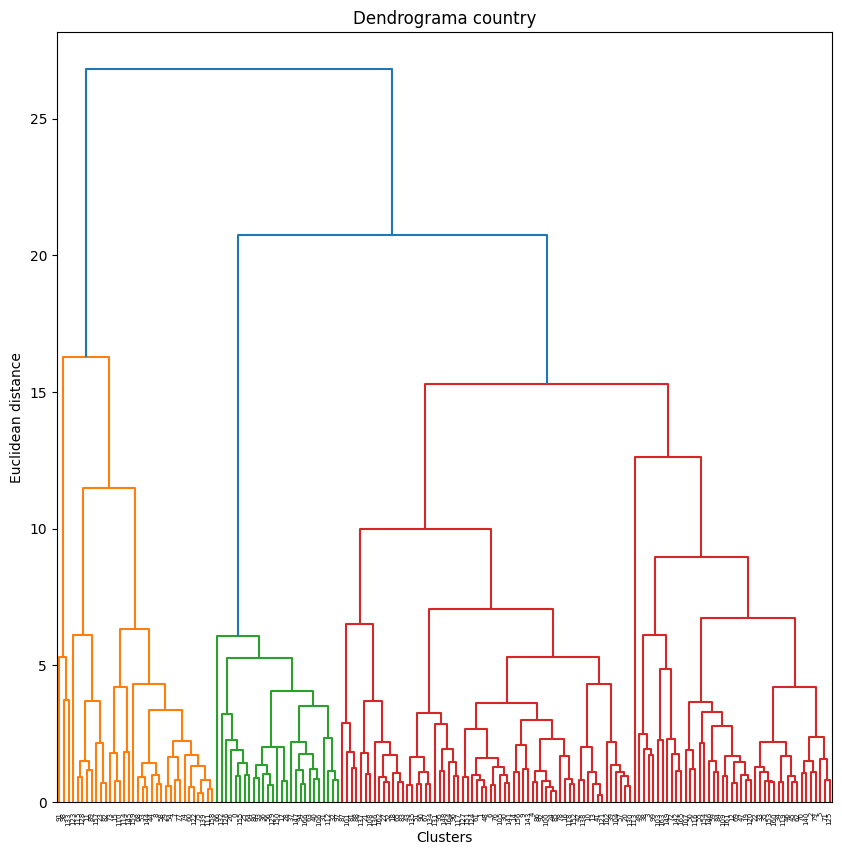

In [29]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method = 'ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.title('Dendrograma country')
plt.show()
#vemos que entre 3 y 2 esta bein, para 4 muy poca dsitancia en y

In [30]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta, aqui fue mejor sin pca
df_country['hc'] = y_hc

0.3153134331018189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### Con PCA

* Calculemos Epsilon y el numero de putnos

In [37]:
from sklearn.neighbors import NearestNeighbors

#Solo calcularemos con el vecino mas cercano
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)#fit del vecino mas cercano
distances, indices = neighbors_fit.kneighbors(pca_data_standard)#guardo en distancias asi como sus indices

* Grafica de las distancias (rodilla)

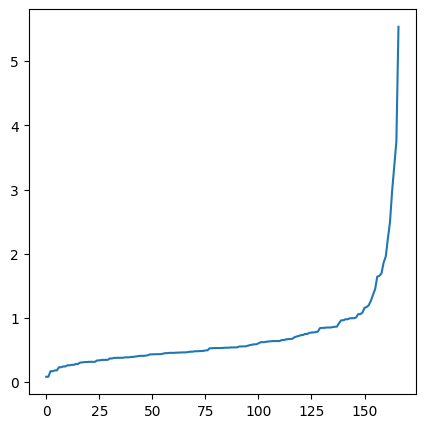

In [38]:
distances = np.sort(distances, axis =0)
distances = distances[:,1] #tomo el valor del mas cernano

fig = plt.figure(figsize=(5,5))
plt.plot(distances)

#esta por ahí entre 0.5-2

* Creemos ahora el set de datos

In [39]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12) #4dimensiones/features

* Iteramos sobre la combinatoria de los productos

In [51]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples)) #dcombinatorioa cruzada
no_of_clusters = []
sil_score = []

for p in dbscan_params:
  #predigo
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
  ##llenoemos indices de silueta y numeros de clusters
  try:
    sil_score.append(silhouette_score(pca_data_standard, y_dbscan)) #indice prediccion vs pca
    
  except:
    sil_score.append(0)
  
  no_of_clusters.append(len(np.unique(y_dbscan)))

* Pivots para verlo matricialmente y evvaluar

In [52]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns= ['eps', 'min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [53]:
pivot_1 = pd.pivot_table(df_param_tunning, values = 'sil_score', columns='eps', index = 'min_samples')
#pivot 2 pero para el numero de clusters ejecutados
pivot_2 = pd.pivot_table(df_param_tunning, values = 'n_clusters', columns='eps', index = 'min_samples')

* Grafiquemos

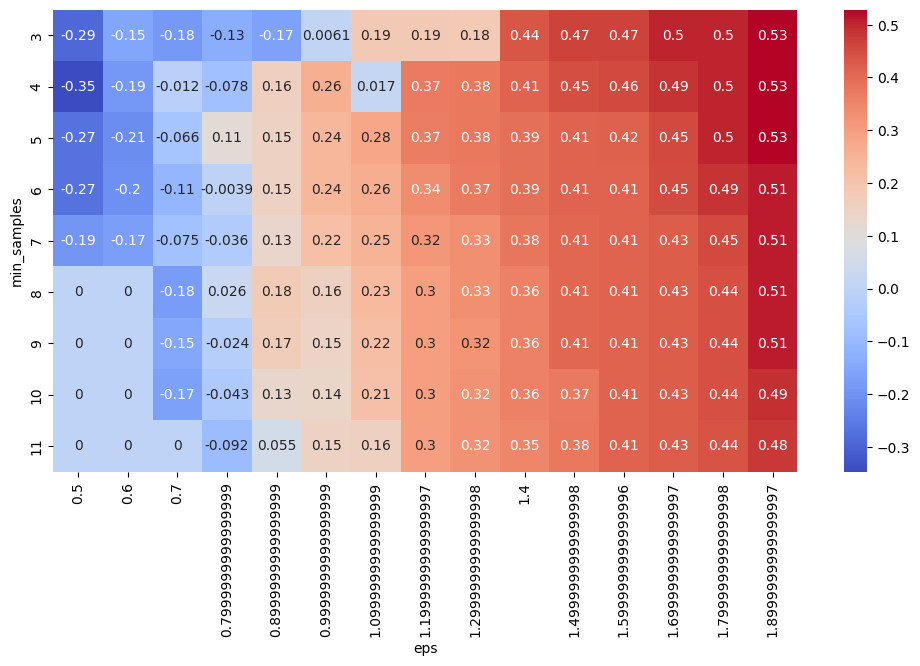

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

#para ejemplos de 3,4,5 y eps de 1.8, tengo altos sil_score 

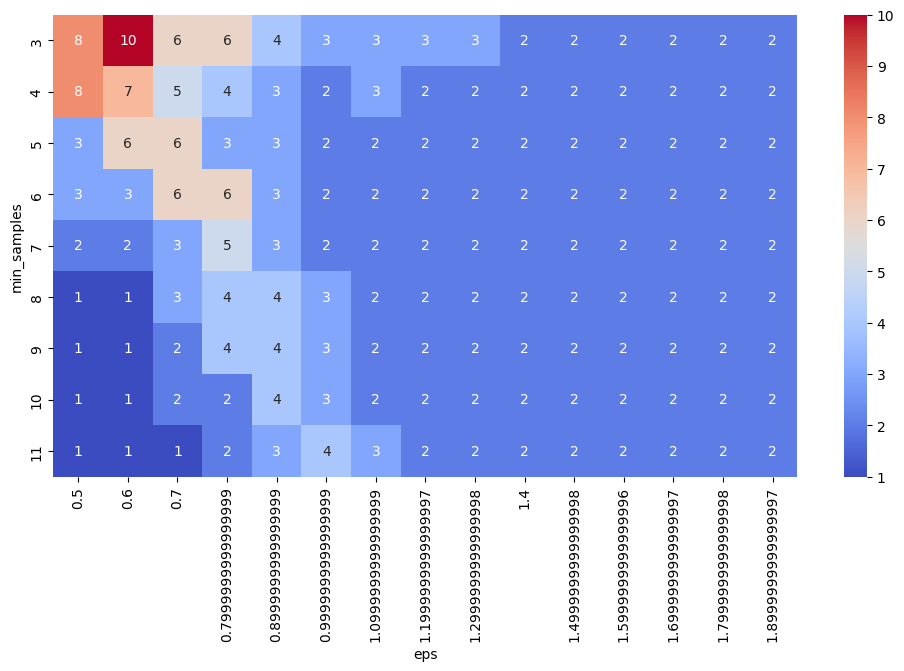

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_2, annot = True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()
#esto corresponde al numero de los clusters usados, y son bajos, muy bajos (2, uno podria ser el cluster y otros ruido)
#esto no sirve aunque el indice de silueta sea muy alto

#por lo mismo busco mas o menos uno que tnga unos 3 clustrs y un alto sil_score

* Seleccione y graifco

In [68]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))

#guardo en df los clusters, dejamos con2, que tiene mayor coeff de silueta, aqui fue mejor sin pca
df_country['dbscan_pca'] = y_dbscan

0.1268191178108563


### Sin PCA